## Data exploration notebook

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy

In [15]:
# Loading data 

df=pd.read_csv("ICU_Challenge_dataset.csv", sep=",")
df

recordid  SAPS-I  SOFA  In-hospital_death   Age  Gender  Height  Weight  \
0       132539       6     1                  0  54.0     0.0     NaN     NaN   
1       132540      16     8                  0  76.0     1.0   175.3    76.0   
2       132541      21    11                  0  44.0     0.0     NaN    56.7   
3       132543       7     1                  0  68.0     1.0   180.3    84.6   
4       132545      17     2                  0  88.0     0.0     NaN     NaN   
...        ...     ...   ...                ...   ...     ...     ...     ...   
5995    151939      19     6                  1  52.0     1.0     NaN    80.0   
5996    151383      13     2                  0  90.0     0.0   157.5    72.0   
5997    149623      12     9                  0  72.0     0.0     NaN   185.0   
5998    145366      18    11                  1  52.0     1.0   182.9    95.9   
5999    146804      19     9                  0  55.0     1.0   177.8    81.7   

      CCU  CSRU  ...  Platelets_last  TroponinI_last  TroponinT_last  \
0       0     0  ...           185.0             NaN             NaN   
1       0     1  ...           135.0             NaN             NaN   
2       0     0  ...           113.0             NaN             NaN   
3       0     0  ...           284.0             NaN             NaN   
4       0     0  ...            97.0             NaN             NaN   
...   ...   ...  ...             ...             ...             ...   
5995    0     0  ...           221.0             NaN             NaN   
5996    1     0  ...           305.0             NaN             NaN   
5997    1     0  ...           167.0             NaN            0.02   
5998    0     0  ...            28.0             NaN             NaN   
5999    0     1  ...           157.0             NaN             NaN   

      WBC_last  Weight_last  pH_last  MechVentStartTime  MechVentDuration  \
0          9.4          NaN      NaN                NaN               NaN   
1         13.3         81.6     7.37               71.0             360.0   
2          6.2         56.7     7.47              617.0            2160.0   
3          7.9         84.6      NaN                NaN               NaN   
4          4.8          NaN      NaN                NaN               NaN   
...        ...          ...      ...                ...               ...   
5995      11.5          NaN     7.46              238.0            2440.0   
5996      12.1         68.5      NaN                NaN               NaN   
5997      12.7          NaN     7.39              188.0            1200.0   
5998       5.8         96.2     7.36              100.0            2760.0   
5999      13.3         98.6     7.41              332.0             960.0   

      MechVentLast8Hour  UrineOutputSum  
0                   NaN             NaN  
1                   0.0             5.0  
2                   1.0            14.0  
3                   NaN             NaN  
4                   NaN             NaN  
...                 ...             ...  
5995                1.0            17.0  
5996                NaN             NaN  
5997                0.0            10.0  
5998                1.0            27.0  
5999                0.0             7.0  

[6000 rows x 121 columns]

In [16]:
# Settings 
DOWNSAMPLING=False
DROPPING_MISSING_DATA=30

In [17]:
# Downsampling
# separare in righe per target
if DOWNSAMPLING: 
    t0=df[df['In-hospital_death']==0]
    t1=df[df['In-hospital_death']==1]
    print("t0 e t1: ", len(t0), len(t1))

In [18]:
# Missing data exploration 

# print(df[df.columns[df.isna().any()]])
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)
#print(df[df.columns[df.isna().any()]].isna().sum())

                         column_name  percent_missing
recordid                    recordid         0.000000
SAPS-I                        SAPS-I         0.000000
SOFA                            SOFA         0.000000
In-hospital_death  In-hospital_death         0.000000
Age                              Age         0.000000
...                              ...              ...
TroponinT_first      TroponinT_first        77.766667
Cholesterol_last    Cholesterol_last        92.133333
Cholesterol_first  Cholesterol_first        92.133333
TroponinI_last        TroponinI_last        95.250000
TroponinI_first      TroponinI_first        95.250000

[121 rows x 2 columns]


In [19]:
# Dropping data with missing percentage > DROPPING_MISSING_DATA value and dropping record ID

df_col_keep = missing_value_df[missing_value_df['percent_missing']<DROPPING_MISSING_DATA]
df_col = df_col_keep['column_name']

df=df[df_col]
df.drop(['recordid'], axis=1,inplace=True)
df

/usr/local/anaconda3/envs/Lab/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


SAPS-I  SOFA  In-hospital_death   Age  CCU  CSRU  SICU  Gender  \
0          6     1                  0  54.0    0     0     1     0.0   
1         16     8                  0  76.0    0     1     0     1.0   
2         21    11                  0  44.0    0     0     0     0.0   
3          7     1                  0  68.0    0     0     0     1.0   
4         17     2                  0  88.0    0     0     0     0.0   
...      ...   ...                ...   ...  ...   ...   ...     ...   
5995      19     6                  1  52.0    0     0     1     1.0   
5996      13     2                  0  90.0    1     0     0     0.0   
5997      12     9                  0  72.0    1     0     0     0.0   
5998      18    11                  1  52.0    0     0     0     1.0   
5999      19     9                  0  55.0    0     1     0     1.0   

      BUN_first  Creatinine_last  ...  NIDiasABP_first  NIMAP_highest  \
0          13.0              0.7  ...             65.0          92.33   
1          16.0              1.3  ...             38.0          88.33   
2           8.0              0.3  ...             84.0         110.00   
3          23.0              0.7  ...             63.0         100.70   
4          45.0              1.0  ...             41.0         105.70   
...         ...              ...  ...              ...            ...   
5995       11.0              0.6  ...              NaN            NaN   
5996       20.0              0.7  ...             80.0         117.30   
5997       62.0              2.8  ...             63.0         100.30   
5998       16.0              1.0  ...             74.0          92.00   
5999       14.0              1.3  ...             43.0          68.67   

      NIDiasABP_highest  NIDiasABP_last  pH_last  pH_first  PaCO2_first  \
0                  67.0            55.0      NaN       NaN          NaN   
1                  67.0            49.0     7.37      7.45         34.0   
2                  95.0            84.0     7.47      7.51         37.0   
3                  81.0            81.0      NaN       NaN          NaN   
4                  96.0            42.0      NaN       NaN          NaN   
...                 ...             ...      ...       ...          ...   
5995                NaN             NaN     7.46      7.43         37.0   
5996              100.0            75.0      NaN       NaN          NaN   
5997               74.0            51.0     7.39      7.27         89.0   
5998               74.0            44.0     7.36      7.30         33.0   
5999               43.0            43.0     7.41      7.30         51.0   

      PaCO2_last  PaO2_last  PaO2_first  
0            NaN        NaN         NaN  
1           46.0      140.0       344.0  
2           37.0      173.0        65.0  
3            NaN        NaN         NaN  
4            NaN        NaN         NaN  
...          ...        ...         ...  
5995        32.0      119.0       368.0  
5996         NaN        NaN         NaN  
5997        65.0       93.0        50.0  
5998        42.0       86.0        94.0  
5999        38.0       78.0       377.0  

[6000 rows x 68 columns]

(array([5162.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         838.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

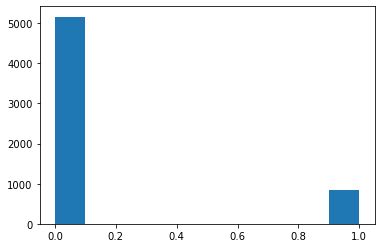

In [20]:
# Unbalanced output target 

df['In-hospital_death'].unique()
fig, ax = plt.subplots()
ax.hist(df['In-hospital_death'])


In [23]:
# Subdivision in categorical and numerical variables
# Variable type categorical / numerical
# All categorical variables are binary categories

print(np.unique(df.dtypes))

int_var = list(df.columns[df.dtypes == np.int64])
float_var = list(df.columns[df.dtypes == np.float64])

cat_var = []
num_var = []
for cat in list(df.columns):
    if len(df[cat].unique()) <=3: #conta anche i Nan come valori
        cat_var.append(cat)
    else:
        num_var.append(cat)

categorical_df = df[cat_var]
numerical_df = df[num_var]



[dtype('int64') dtype('float64')]


<function matplotlib.pyplot.show(close=None, block=None)>

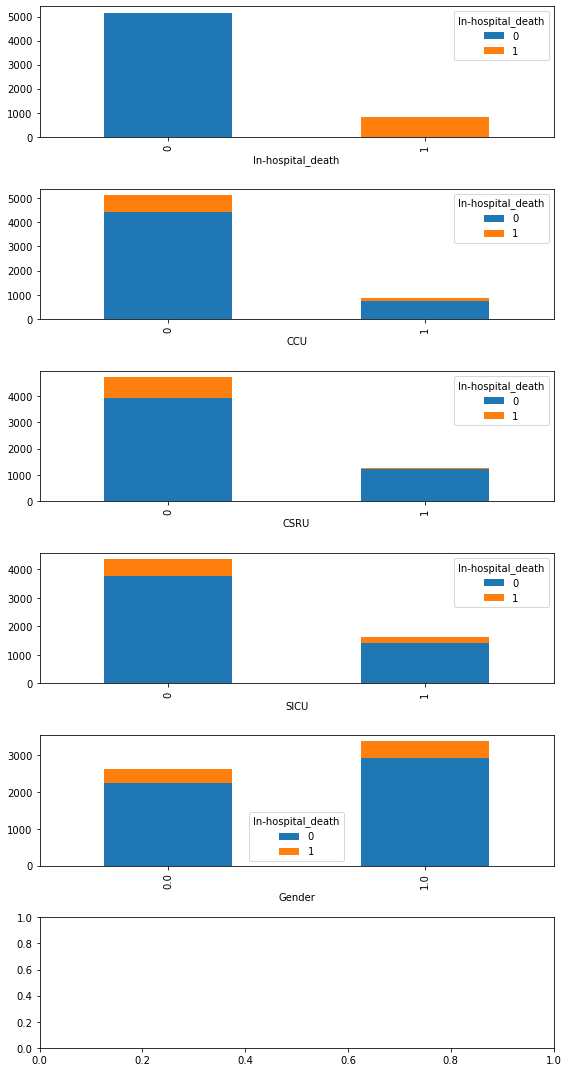

In [24]:
# Bivariate analysis of categorical variables:
# Who is CSRU for example is very unlikely to die 
# Opposite for who had mechanical ventilation within the last 8 hours
# The gender variable has quite a balanced subdivision, so it is probably not so relevant 

fig, ax = plt.subplots(nrows=6)
for c, col in enumerate(list(categorical_df.columns)): 
    clarity_color_table = pd.crosstab(index=categorical_df[col], 
                              columns=categorical_df["In-hospital_death"])

    clarity_color_table.plot(kind="bar", 
                     figsize=(8,15),
                     stacked=True, ax=ax[c], xlabel=col)
fig.tight_layout()
plt.show

In [25]:
categorical_df.columns

Index(['In-hospital_death', 'CCU', 'CSRU', 'SICU', 'Gender'], dtype='object')

## Numerical analysis

In [26]:
numerical_df


SAPS-I  SOFA   Age  BUN_first  Creatinine_last  BUN_last  \
0          6     1  54.0       13.0              0.7       8.0   
1         16     8  76.0       16.0              1.3      21.0   
2         21    11  44.0        8.0              0.3       3.0   
3          7     1  68.0       23.0              0.7      10.0   
4         17     2  88.0       45.0              1.0      25.0   
...      ...   ...   ...        ...              ...       ...   
5995      19     6  52.0       11.0              0.6       9.0   
5996      13     2  90.0       20.0              0.7      23.0   
5997      12     9  72.0       62.0              2.8      67.0   
5998      18    11  52.0       16.0              1.0      25.0   
5999      19     9  55.0       14.0              1.3      23.0   

      Creatinine_first  HCT_first  HCT_last  HR_first  ...  NIDiasABP_first  \
0                  0.8       33.7      30.3      73.0  ...             65.0   
1                  0.8       24.7      29.4      88.0  ...             38.0   
2                  0.4       28.5      29.4     100.0  ...             84.0   
3                  0.9       41.3      36.3      79.0  ...             63.0   
4                  1.0       22.6      30.9      93.0  ...             41.0   
...                ...        ...       ...       ...  ...              ...   
5995               0.6       30.3      26.8      68.0  ...              NaN   
5996               0.7       26.0      32.0      88.0  ...             80.0   
5997               2.6       34.9      32.0     103.0  ...             63.0   
5998               1.1       18.0      24.7     143.0  ...             74.0   
5999               0.9       20.0      28.9      95.0  ...             43.0   

      NIMAP_highest  NIDiasABP_highest  NIDiasABP_last  pH_last  pH_first  \
0             92.33               67.0            55.0      NaN       NaN   
1             88.33               67.0            49.0     7.37      7.45   
2            110.00               95.0            84.0     7.47      7.51   
3            100.70               81.0            81.0      NaN       NaN   
4            105.70               96.0            42.0      NaN       NaN   
...             ...                ...             ...      ...       ...   
5995            NaN                NaN             NaN     7.46      7.43   
5996         117.30              100.0            75.0      NaN       NaN   
5997         100.30               74.0            51.0     7.39      7.27   
5998          92.00               74.0            44.0     7.36      7.30   
5999          68.67               43.0            43.0     7.41      7.30   

      PaCO2_first  PaCO2_last  PaO2_last  PaO2_first  
0             NaN         NaN        NaN         NaN  
1            34.0        46.0      140.0       344.0  
2            37.0        37.0      173.0        65.0  
3             NaN         NaN        NaN         NaN  
4             NaN         NaN        NaN         NaN  
...           ...         ...        ...         ...  
5995         37.0        32.0      119.0       368.0  
5996          NaN         NaN        NaN         NaN  
5997         89.0        65.0       93.0        50.0  
5998         33.0        42.0       86.0        94.0  
5999         51.0        38.0       78.0       377.0  

[6000 rows x 63 columns]

<AxesSubplot:>

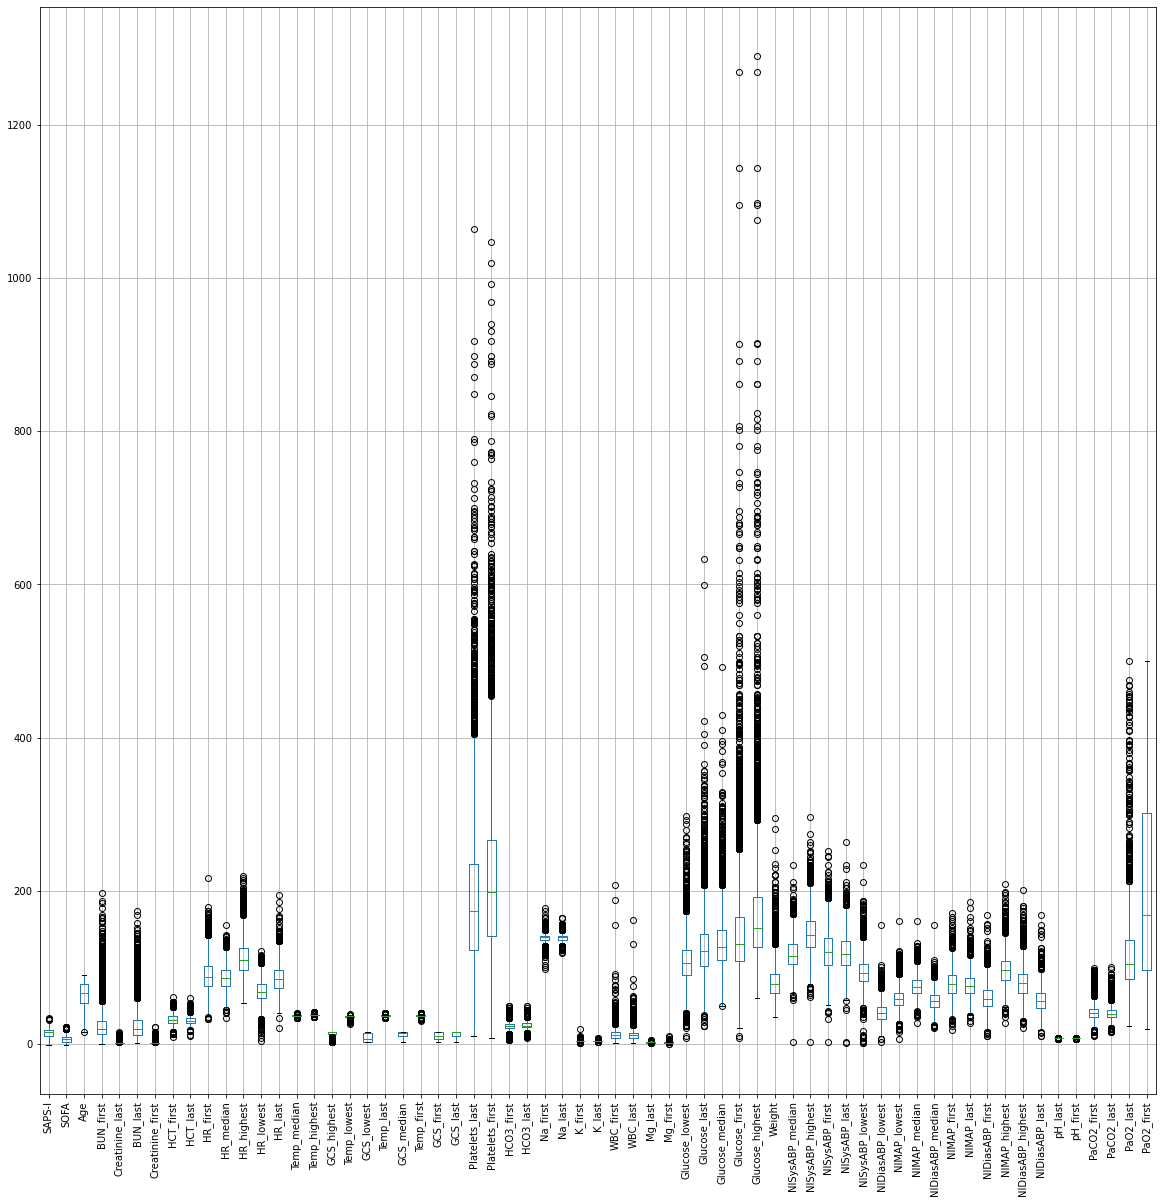

In [33]:
# Plotting numerical variables distributions 

fig, ax = plt.subplots(figsize=(20,20))
numerical_df.boxplot(ax=ax, rot=90)


In [34]:
# Dividing numerical variables that have a matched pair first/last
col_first = []
col_last = []
col_single = []
for x in list(numerical_df.columns): 
    if 'first' in x: 
        col_first.append(x)
    elif 'last' in x: 
        col_last.append(x)
    else: 
        col_single.append(x)
col_first.sort()
col_last.sort()
print(col_first)
print(col_last)
print(len(col_first))


print(df[col_first].shape)
df_first_last = pd.concat([df[col_first], df[col_last]], axis=1)
df_numerical_single = df[col_single]

['BUN_first', 'Creatinine_first', 'GCS_first', 'Glucose_first', 'HCO3_first', 'HCT_first', 'HR_first', 'K_first', 'Mg_first', 'NIDiasABP_first', 'NIMAP_first', 'NISysABP_first', 'Na_first', 'PaCO2_first', 'PaO2_first', 'Platelets_first', 'Temp_first', 'WBC_first', 'pH_first']
['BUN_last', 'Creatinine_last', 'GCS_last', 'Glucose_last', 'HCO3_last', 'HCT_last', 'HR_last', 'K_last', 'Mg_last', 'NIDiasABP_last', 'NIMAP_last', 'NISysABP_last', 'Na_last', 'PaCO2_last', 'PaO2_last', 'Platelets_last', 'Temp_last', 'WBC_last', 'pH_last']
19
(6000, 19)


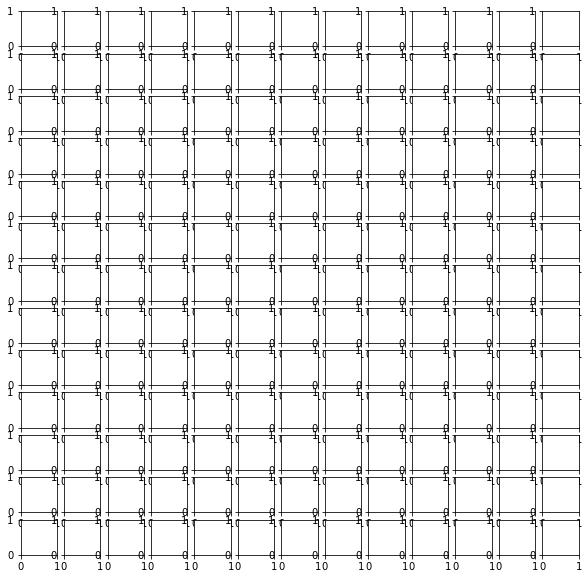

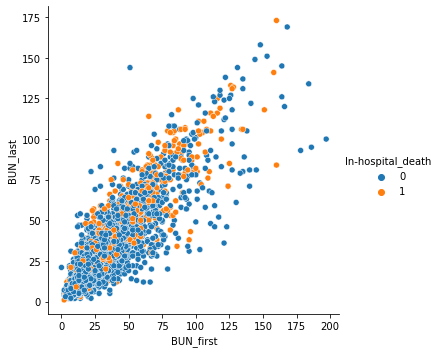

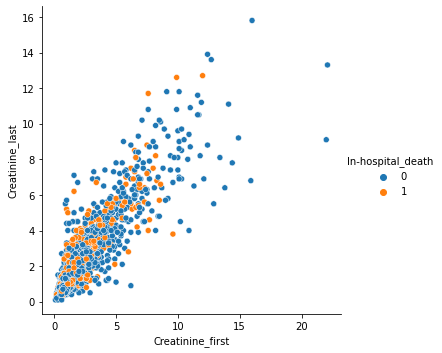

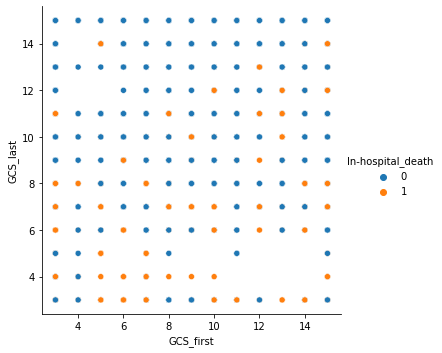

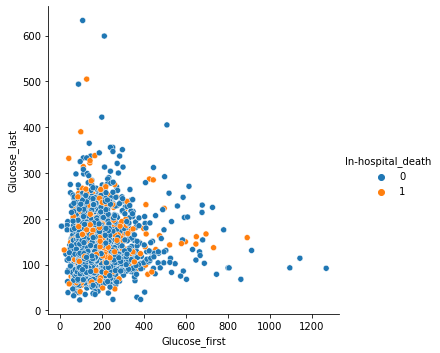

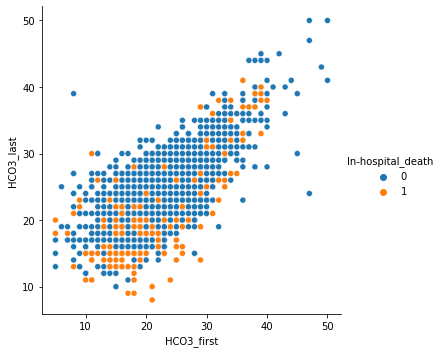

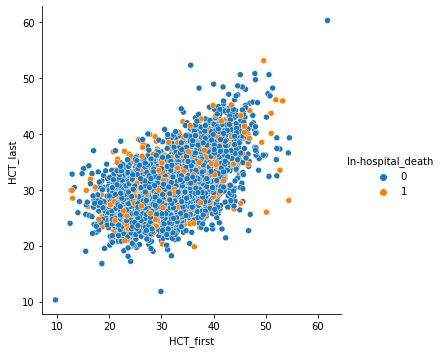

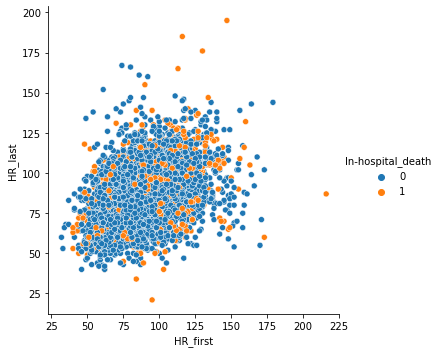

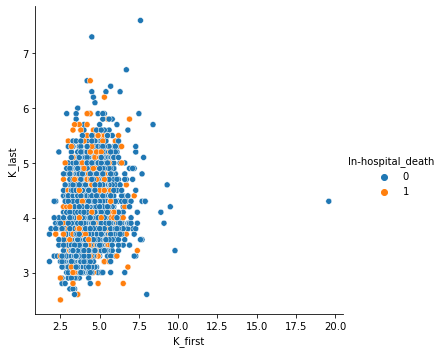

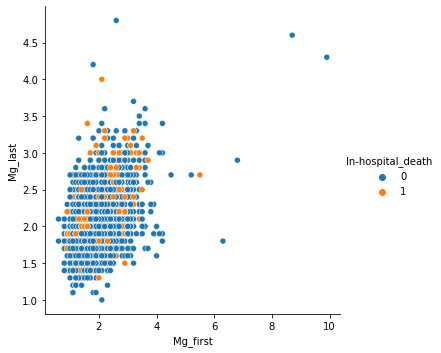

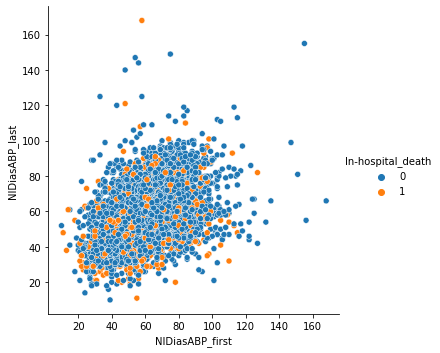

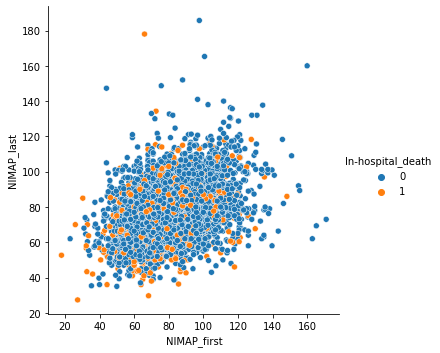

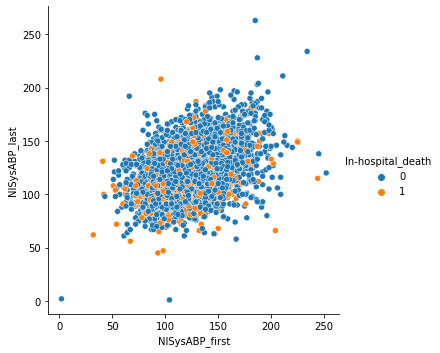

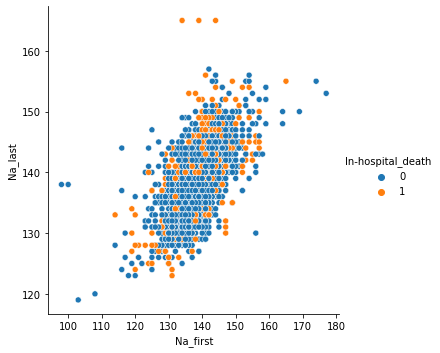

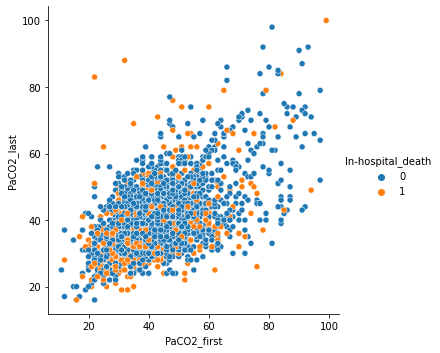

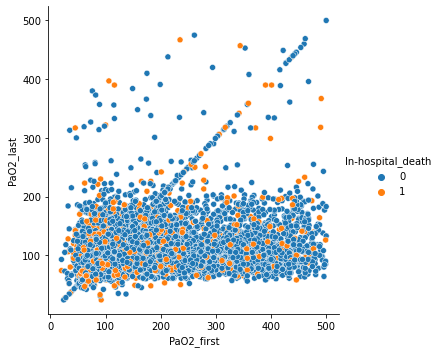

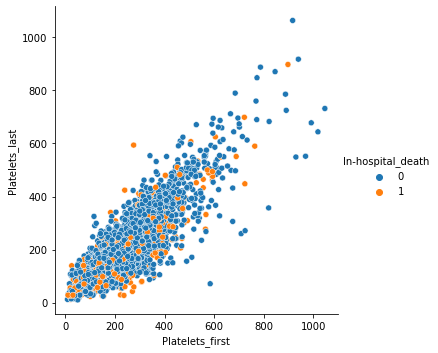

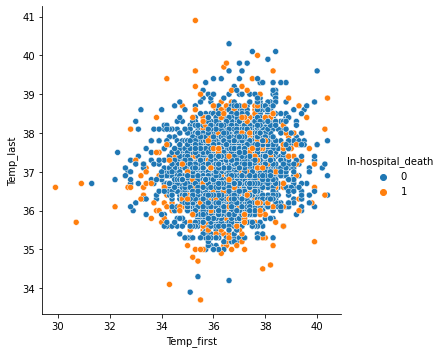

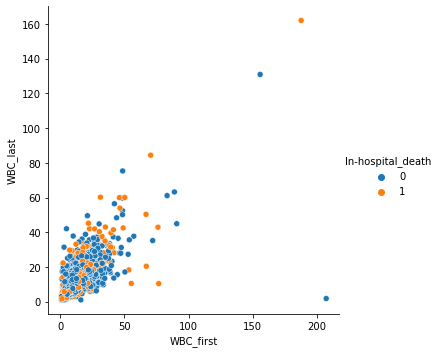

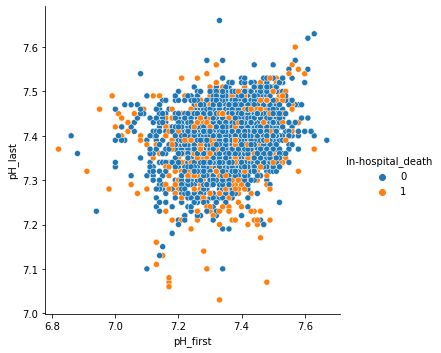

In [35]:
# Bivariate analysis of numerical variables (FIRST AND LAST)

# Interesting plot of LACTATE FIRST and LAST (non c'è se togliamo dropping_missing a 30 OK)
# Anche WEIGHT LAST e FIRST 


fig, ax = plt.subplots(nrows=13, ncols=13, figsize=(10,10))
colonna=0
for c, col in enumerate(col_first): 
    sns.relplot(x = col, y = col_last[c], hue='In-hospital_death',data = df)

if DROPPING_MISSING_DATA == 30: 
    


In [142]:
# Function to 1) remove highly correlated variables 2) plot the correlation heatmap 

#commento extra
def scremare_highly_correlated(df, threshold): 
    corr = df.corr()
    df_after_corr = df.copy()
    cols = list(corr.columns)
    for c, col in enumerate(corr.columns): 
        pos=list(np.where(corr[col]>threshold)[0])
        pos_uno = list(np.where(corr[col]==1)[0])
        pos.remove(pos_uno[0])
        try: 
            
            cols.remove(np.array(cols)[pos])

        except: 
            print('ok')


    print('Before removing highly correlated columns: ' + str(len(df.columns)))
    print('After removing highly correlated columns: ' + str(len(cols)))

    return df_after_corr

def plot_correlation_heatmap(df):
    plt.figure(figsize=(20,20))
    corr = df.corr()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True, annot=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=45,

    );
    
def compute_pearson_corr(df, target): 
    from scipy.stats import pearsonr
    pearson_corr = []
    pvalues=[]
    not_sign_corr=[]
    considered_cols = []
    for col in list(df.columns): 
        df[col].fillna(value=df[col].mean(), inplace=True)
        if df[col].isnull().sum()<1: 
            corr, pval = pearsonr(df[col], target)
            if pval>=0.05:
                not_sign_corr.append(col)
            considered_cols.append(col)
            pearson_corr.append(corr)
            pvalues.append(pval)
            #print('Pearsons correlation: %.3f' % corr)
    print(len(pearson_corr))
    return pearson_corr, pvalues, not_sign_corr

def compute_spear_corr(df, target): 
    from scipy.stats import spearmanr
    pearson_corr = []
    pvalues=[]
    not_sign_corr=[]
    considered_cols = []
    for col in list(df.columns): 
        df[col].fillna(value=df[col].mean(), inplace=True)
        if df[col].isnull().sum()<1: 
            corr, pval = spearmanr(df[col], target)
            if pval>=0.05:
                not_sign_corr.append(col)
            considered_cols.append(col)
            pearson_corr.append(corr)
            pvalues.append(pval)
            #print('Pearsons correlation: %.3f' % corr)
    print(len(pearson_corr))
    return pearson_corr, pvalues, not_sign_corr

def plot_pearson(pearson, pvalues, cols, title): 
    import matplotlib.patches as mpatches
    patches=[]
    colors=['#BADEFC', '#0A86EB']
    label=['Significant association', 'Not significant association']
    fig, ax = plt.subplots(figsize=(20,10))
    for i in range(len(pearson)): 
        if pvalues[i]<0.05: 
            colore=colors[0]# THERE IS STATISTICAL SIGNIFICANT ASSOCIATION BETWEEN THE VARIABLES TOP 
        else: 
            colore=colors[1]# più scuro 
        
        ax.bar(i, pearson[i], color=colore)
        ax.set_xticks(np.arange(len(pearson)), cols, rotation=45)
    ax.grid(axis='x')
    patches = [ mpatches.Patch(color=colors[a], label="{:s}".format(label[a]) ) for a in range(len(label)) ]
    ax.legend(handles=patches)
    plt.title(title)
    

38


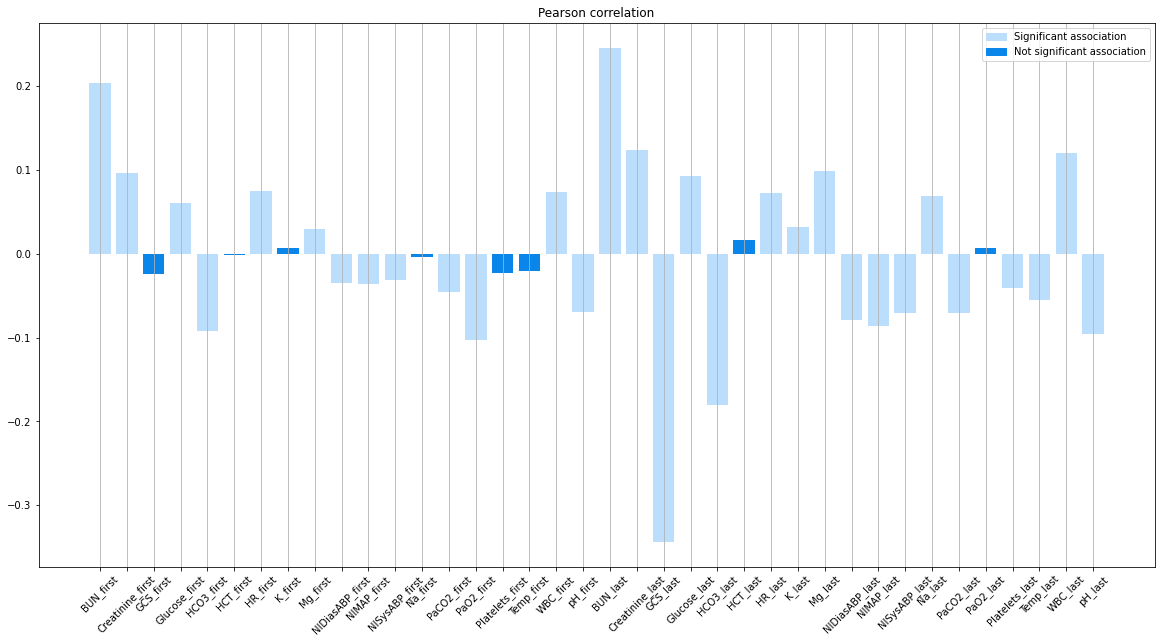

In [91]:
target = np.array(df['In-hospital_death'])
pearson_corr_firstlast, pvalues_firstlast, not_sign_corr_pears = compute_pearson_corr(df_first_last, target)
plot_pearson(pearson_corr_firstlast, pvalues_firstlast , list(df_first_last.columns), 'Pearson correlation')

38


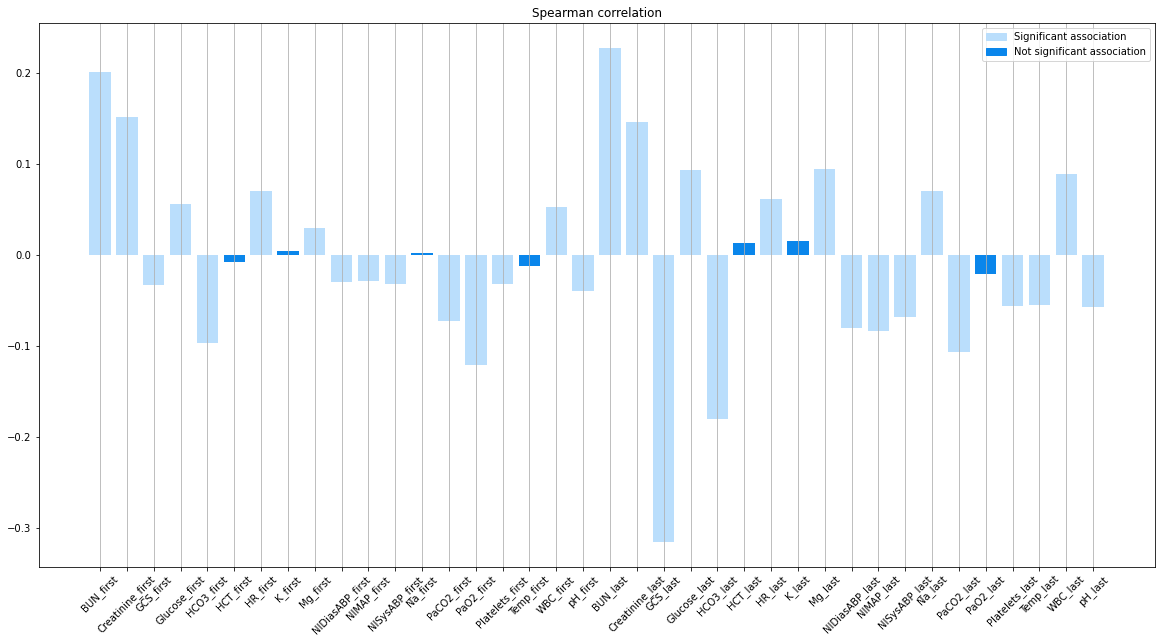

In [47]:
spear_corr_firstlast, spear_pvalues_firstlast, not_sign_corr_spear = compute_spear_corr(df_first_last, target)
plot_pearson(spear_corr_firstlast, spear_pvalues_firstlast , list(df_first_last.columns), 'Spearman correlation')


In [56]:
print(not_sign_corr_spear)
print(not_sign_corr_pears)

both_not_sign_corr = []
for i in range(max(len(not_sign_corr_pears), len(not_sign_corr_spear))):
    if not_sign_corr_pears[i] in not_sign_corr_spear: 
               both_not_sign_corr.append(not_sign_corr_pears[i])
            
print(both_not_sign_corr)

['HCT_first', 'K_first', 'Na_first', 'Temp_first', 'HCT_last', 'K_last', 'PaO2_last']
['GCS_first', 'HCT_first', 'K_first', 'Na_first', 'Platelets_first', 'Temp_first', 'HCT_last', 'PaO2_last']
['HCT_first', 'K_first', 'Na_first', 'Temp_first', 'HCT_last', 'PaO2_last']


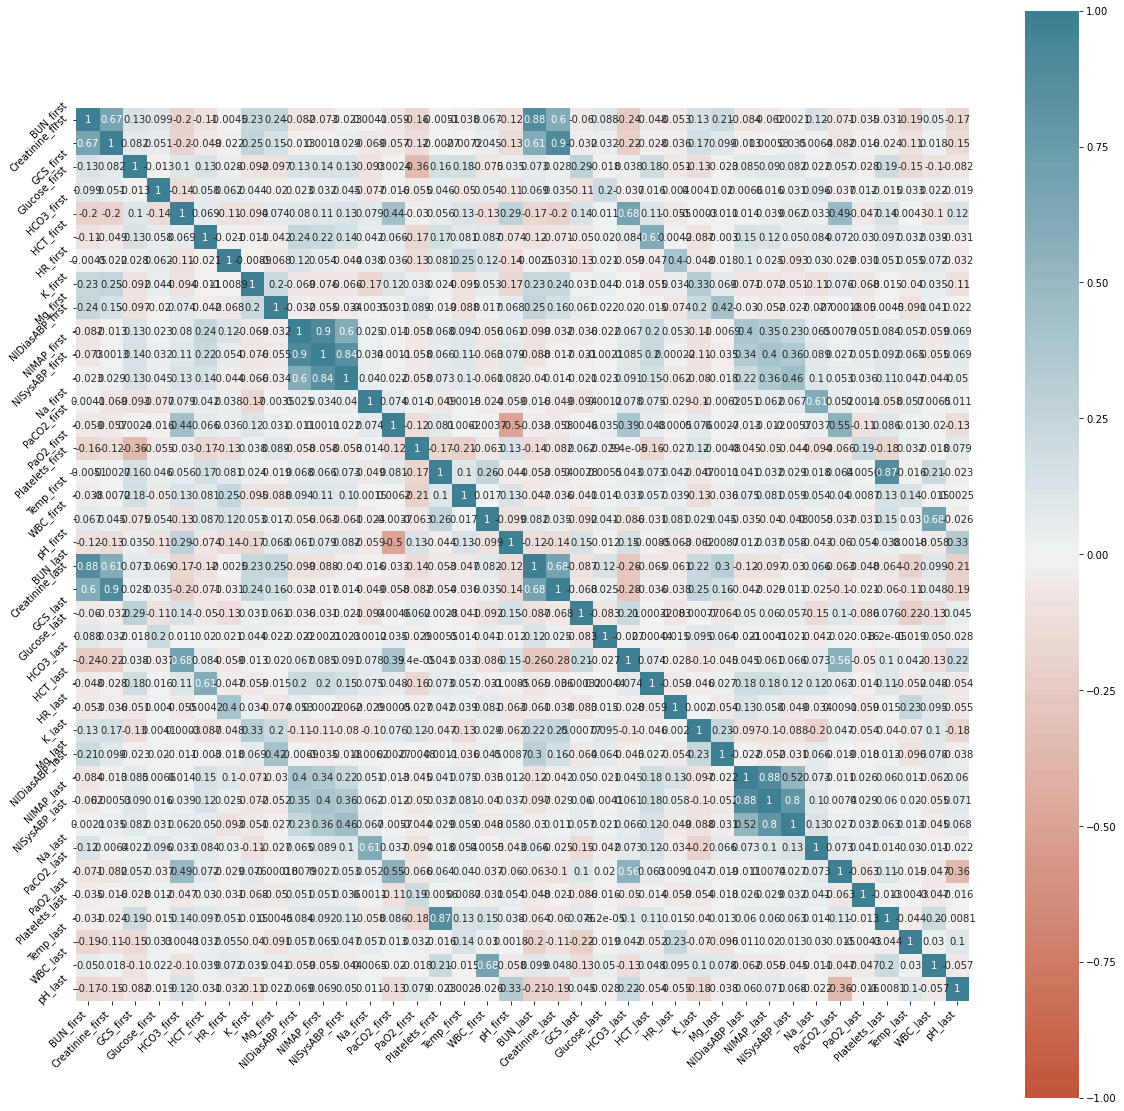

In [95]:
# Heatmap first last 
plot_correlation_heatmap(df_first_last)

/var/folders/km/52y7gmdx3n16d72qd0p8w3b00000gn/T/ipykernel_18583/1998174320.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  cols.remove(np.array(cols)[pos])


ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
Before removing highly correlated columns: 38
After removing highly correlated columns: 29


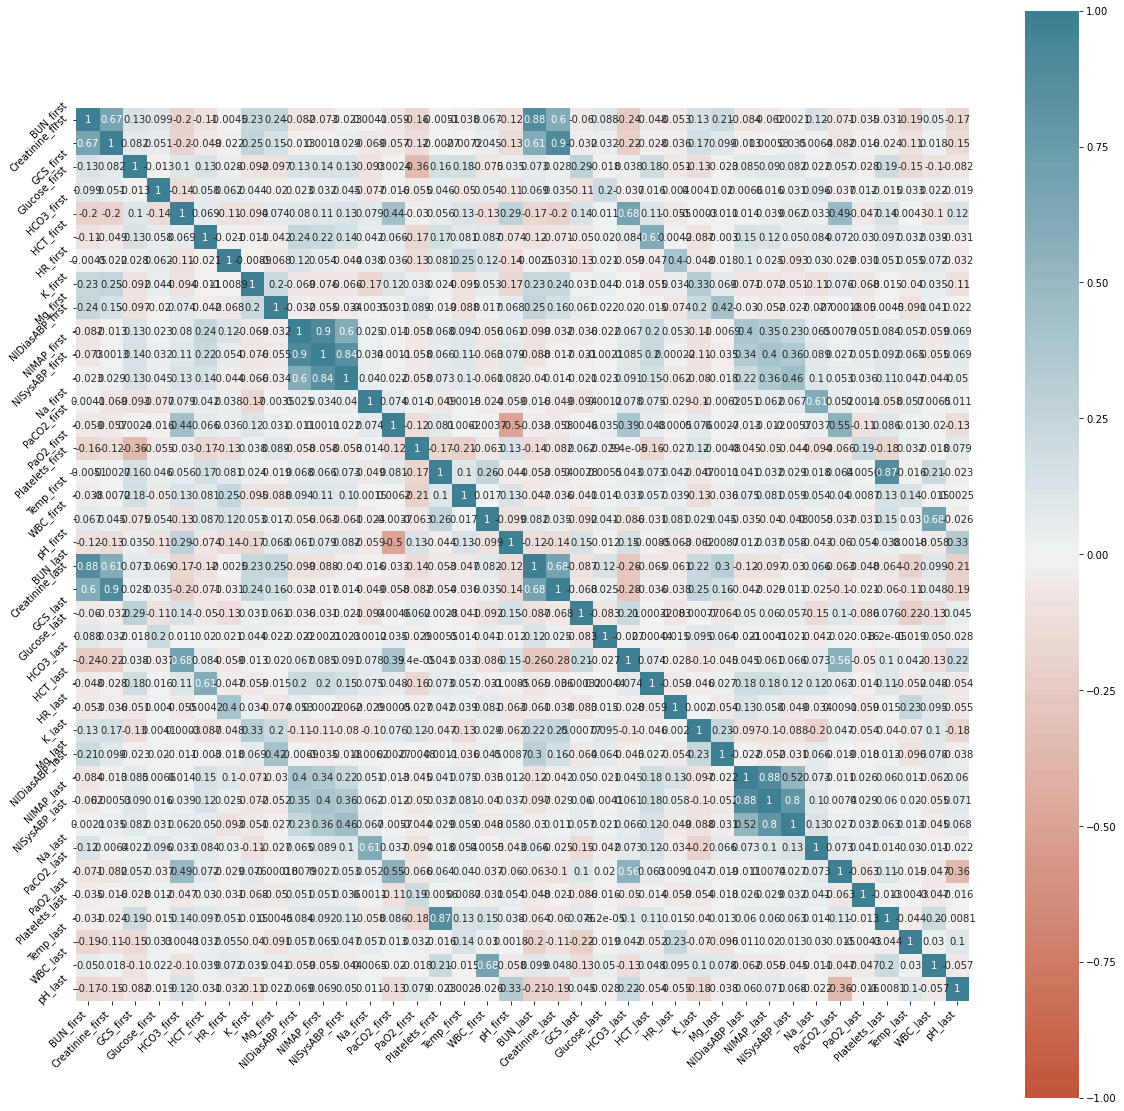

In [145]:
# Codice per rimuovere variabili con più del 0.65 di correlazione - possiamo anche modificare la treshold 
# sempre solamente tra le variabili numeriche con FIRST/LAST 
        
df_after_corr = scremare_highly_correlated(df_first_last, 0.8)
# Correlation between numerical variables that are remained (FIRST/LAST)
plot_correlation_heatmap(df_after_corr)

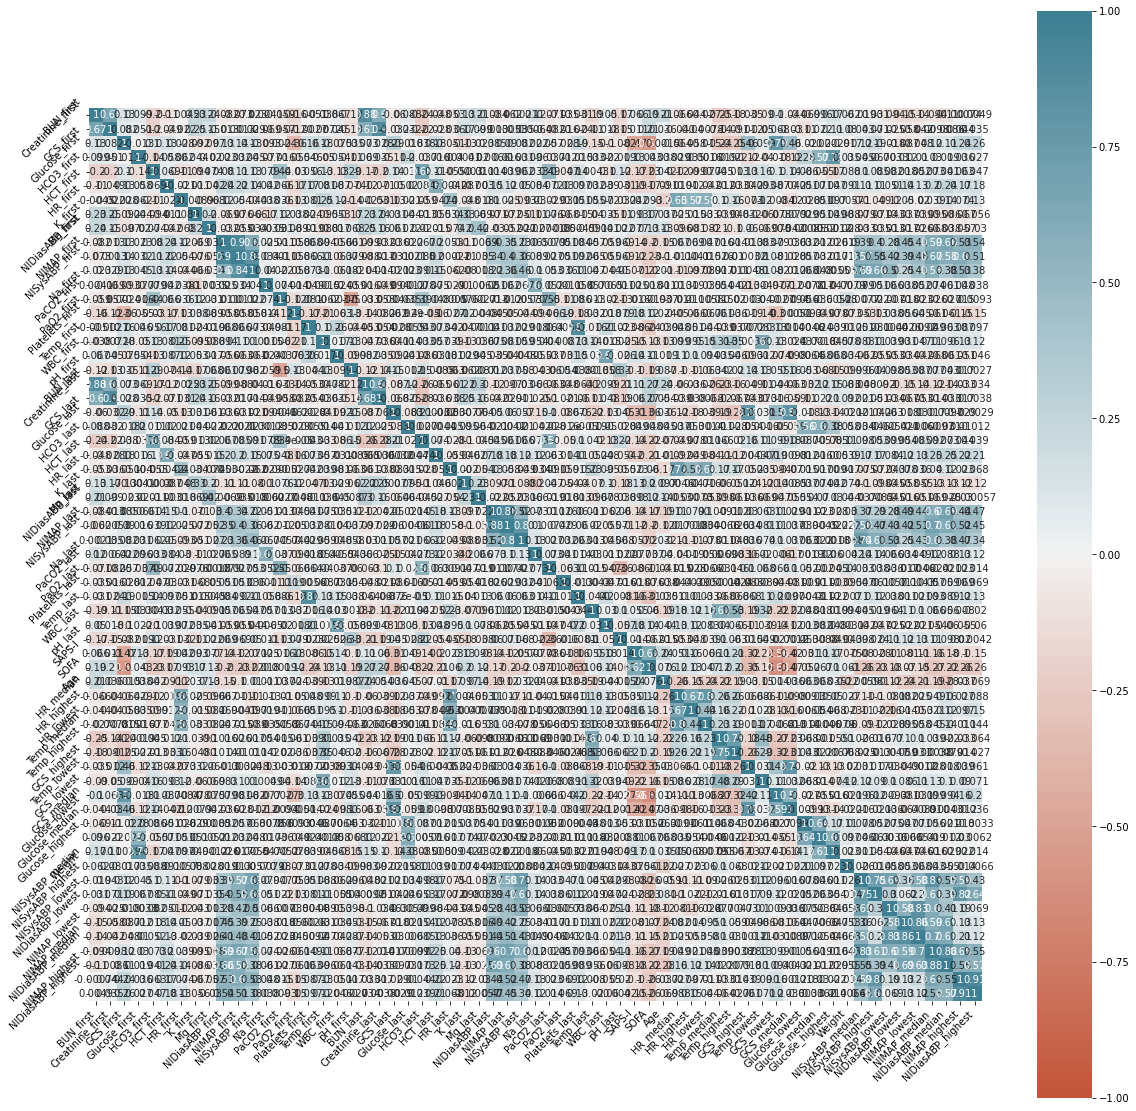

In [146]:
# Uniamo le variabili rimaste FIRST/LAST con le altre numeriche: 
df_numeriche_rimaste = pd.concat([df_after_corr, df_numerical_single], axis=1)

# again mostrare correlazione tra le variabili rimaste
plot_correlation_heatmap(df_numeriche_rimaste)

/var/folders/km/52y7gmdx3n16d72qd0p8w3b00000gn/T/ipykernel_18583/1998174320.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  cols.remove(np.array(cols)[pos])


ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
Before removing highly correlated columns: 63
After removing highly correlated columns: 46


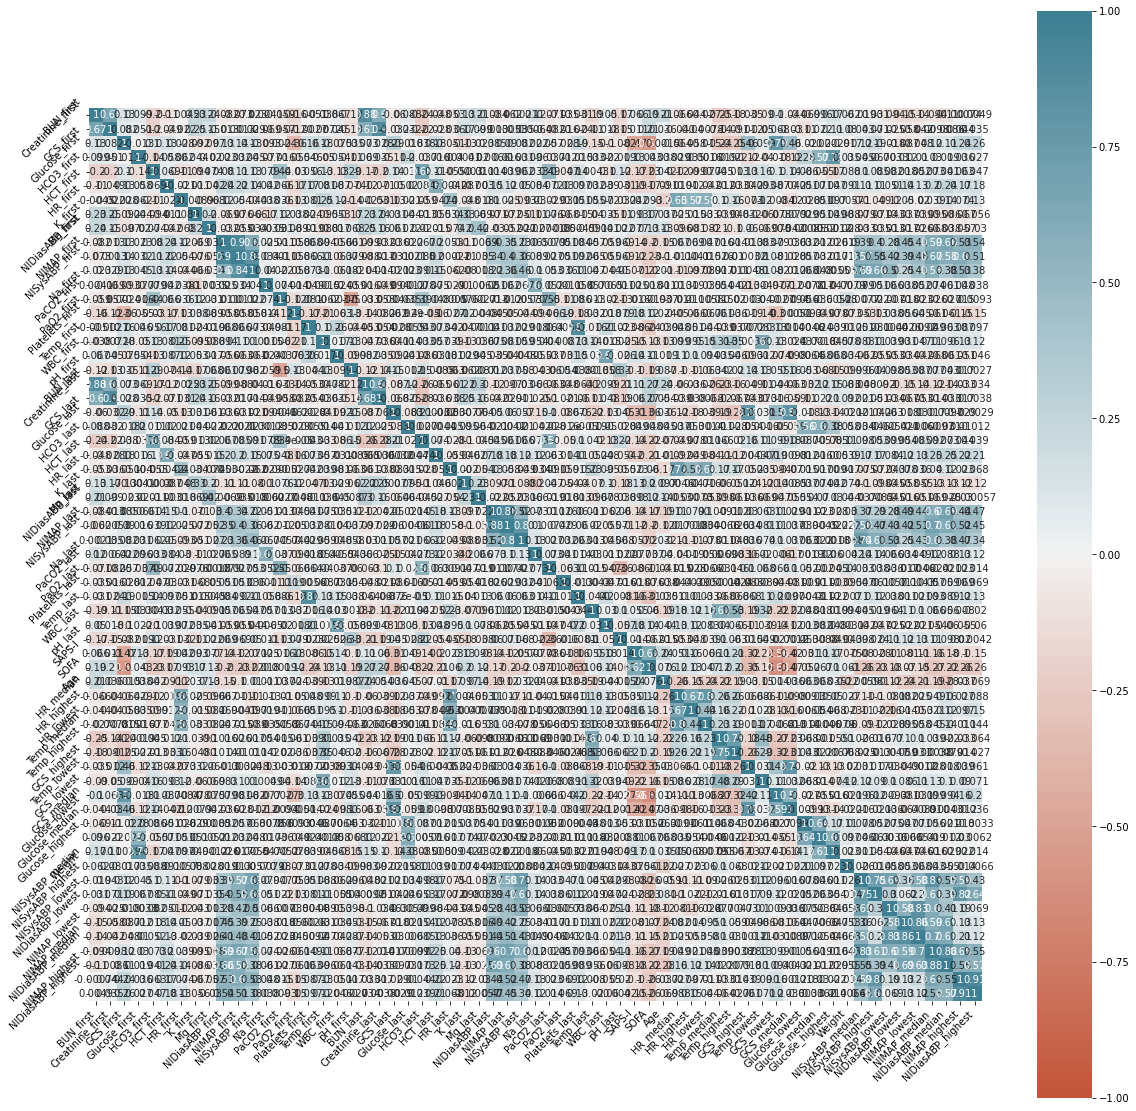

In [148]:
df_after_corr2 = scremare_highly_correlated(df_numeriche_rimaste, 0.7)
plot_correlation_heatmap(df_after_corr2)

In [149]:
df_after_corr2.columns

Index(['BUN_first', 'Creatinine_first', 'GCS_first', 'Glucose_first',
       'HCO3_first', 'HCT_first', 'HR_first', 'K_first', 'Mg_first',
       'NIDiasABP_first', 'NIMAP_first', 'NISysABP_first', 'Na_first',
       'PaCO2_first', 'PaO2_first', 'Platelets_first', 'Temp_first',
       'WBC_first', 'pH_first', 'BUN_last', 'Creatinine_last', 'GCS_last',
       'Glucose_last', 'HCO3_last', 'HCT_last', 'HR_last', 'K_last', 'Mg_last',
       'NIDiasABP_last', 'NIMAP_last', 'NISysABP_last', 'Na_last',
       'PaCO2_last', 'PaO2_last', 'Platelets_last', 'Temp_last', 'WBC_last',
       'pH_last', 'SAPS-I', 'SOFA', 'Age', 'HR_median', 'HR_highest',
       'HR_lowest', 'Temp_median', 'Temp_highest', 'GCS_highest',
       'Temp_lowest', 'GCS_lowest', 'GCS_median', 'Glucose_lowest',
       'Glucose_median', 'Glucose_highest', 'Weight', 'NISysABP_median',
       'NISysABP_highest', 'NISysABP_lowest', 'NIDiasABP_lowest',
       'NIMAP_lowest', 'NIMAP_median', 'NIDiasABP_median', 'NIMAP_highest',
   

In [ ]:
# Differenze 

df['HCT_diff'] = df['HCT_first'] - df['HCT_last']
df['HR_diff'] = df['HR_first'] - df['HR_last']
df['Temp_diff'] = df['Temp_first'] - df['Temp_last']
df['GCS_diff'] = df['GCS_first'] - df['GCS_last']
df['Platelets_diff'] = df['Platelets_first'] - df['Platelets_last']
df['HCO3_diff'] = df['HCO3_first'] - df['HCO3_last']
df['K_diff'] = df['K_first'] - df['K_last']
df['WBC_diff'] = df['WBC_first'] - df['WBC_last']
df['Mg_diff'] = df['Mg_first'] - df['Mg_last']
df['Glucose_diff'] = df['Glucose_first'] - df['Glucose_last']
df['NISysABP_diff'] = df['NISysABP_first'] - df['NISysABP_last']
df['NIDiasABP_diff'] = df['NIDiasABP_first'] - df['NIDiasABP_last']
df['pH_diff'] = df['pH_first'] - df['pH_last']
df['PaO2_diff'] = df['PaO2_first'] - df['PaO2_last']
df['PaCO2_diff'] = df['PaCO2_first'] - df['PaCO2_last']
#df['MAP_diff'] = df['MAP_first'] - df['MAP_last']
#df['SysABP_diff'] = df['SysABP_first'] - df['SysABP_last']
#df['DiasABP_diff'] = df['DiasABP_first'] - df['DiasABP_last']
#df['FiO2_diff'] = df['FiO2_first'] - df['FiO2_last']
#df['Lactate_diff'] = df['Lactate_first'] - df['Lactate_last']

#df = df.drop(['HCT_first', 'HCT_last', 'HR_first', 'HR_last', 'Temp_first', 'Temp_last', 'GCS_first', 'GCS_last', 'Platelets_first', 'Platelets_last', 'HCO3_first', 'HCO3_last', 'K_first', 'K_last', 'WBC_first', 'WBC_last', 'Mg_first', 'Mg_last', 'Glucose_first', 'Glucose_last', 'NISysABP_first', 'NISysABP_last', 'NIDiasABP_first', 'NIDiasABP_last', 'pH_first', 'pH_last', 'PaO2_first', 'PaO2_last', 'PaCO2_first', 'PaCO2_last',  'MAP_first', 'MAP_last', 'SysABP_first', 'SysABP_last', 'DiasABP_first', 'DiasABP_last', 'FiO2_first', 'FiO2_last', 'Lactate_first', 'Lactate_last' ], axis=1)
df = df.drop(['HCT_first', 'HCT_last', 'HR_first', 'HR_last', 'Temp_first', 'Temp_last', 'GCS_first', 'GCS_last', 'Platelets_first', 'Platelets_last', 'HCO3_first', 'HCO3_last', 'K_first', 'K_last', 'WBC_first', 'WBC_last', 'Mg_first', 'Mg_last', 'Glucose_first', 'Glucose_last', 'NISysABP_first', 'NISysABP_last', 'NIDiasABP_first', 'NIDiasABP_last', 'pH_first', 'pH_last', 'PaO2_first', 'PaO2_last', 'PaCO2_first', 'PaCO2_last'], axis=1)
df